##  Regression

### Maxim Panov & Mikhail Belyaev


### Outline
- Introduction
- Linear regression
- Linear regression with nonlinear basis functions
- Nonlinear regression
- Examples

### Outline
- **Introduction**
- Linear regression
- Linear regression with nonlinear basis functions
- Nonlinear regression
- Examples

### Regression

- $X$, input - a description of some object;
- $Y$, output - a characteristic of object;
- $f$, dependency - some method of characteristic calculation based on object description;
- $\left(X, Y = f\left(X\right)\right)$ - observations;
- $S = \left\{X_i, Y_i\right\}_{i=1}^N$, training sample - a set of $N$ observations;
- $\hat f$, regression model - mathematical function which mimics original dependency $f$.

### Regression
- $X$ some $d_{in}$ - dimensional vector describing object design (e.g. geometry parameters of aircraft shape)
- $Y$ some $d_{out}$-dimensional vector of an object characteristics with description $X$ (e.g. lift and drag coefficients)
- The rule $f \colon \; X \mapsto Y$ (e.g. CFD code or experiments in wind tunnel)

![image](./figures/CFD_modified.png)

### Olympic Marathon Data

-   Gold medal times for Olympic Marathon since 1896.

-   Marathons before 1924 didn’t have a standardised distance. Present results using pace per km.

-   In 1904 Marathon was badly organised leading to very slow times.

![image](./figures/Stephen_Kiprotich.jpg)
Image from Wikimedia Commons <http://bit.ly/16kMKHQ>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()
%matplotlib inline

In [2]:
olympic_marathon = pd.read_csv('olympic_marathon_men.csv')
olympic_marathon.head()

,Year,Pace
0,1896.0,4.470833
1,1900.0,4.464729
2,1904.0,5.222083
3,1908.0,4.154679
4,1912.0,3.903317


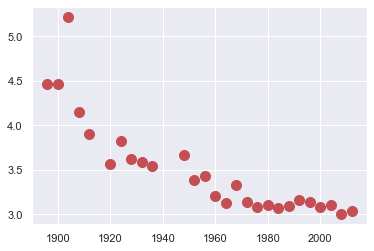

In [3]:
plt.plot(olympic_marathon['Year'], olympic_marathon['Pace'], 'ro', markersize=10)

![alt text](https://cdn-s3.si.com/s3fs-public/styles/marquee_large_2x/public/2018/09/16/eliud-kipchoge-marathon-world-record-berlin-2018.jpg?itok=jCgeutcf "Eliud Kipchoge 2:01:39")

### Outline
- Introduction
- **Linear regression**
- Linear regression with nonlinear basis functions
- Nonlinear regression
- Examples

### Linear Regression
![image](./figures/linear_regression.PNG)

### Gaussian Density
![](./figures/gaussian_of_height.svg)
The Gaussian PDF with $\mu=1.7$ and variance $\sigma^2=
  0.0225$. Mean shown as red line. It could represent the heights of a population of
  students.

### Gaussian Density
$$
\mathcal{N}(y|\mu, \sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y-\mu)^2}{2\sigma^2}\right),
$$

where $\sigma^2$ is the variance of the density and $\mu$ is the mean.

### Two Important Gaussian Properties

**Sum of Gaussian**

-   Sum of Gaussian variables is also Gaussian.
    $$y_j \sim \mathcal{N}(\mu_j, \sigma_j^2)$$ 
    And the sum is distributed as
    $$\sum_{j=1}^{J} y_j \sim \mathcal{N}\left(\sum_{j=1}^J \mu_j,\sum_{j=1}^J \sigma_j^2\right)$$
    
    *Note*: As number of summands increases, sum of non-Gaussian, finite variance variables is
    also Gaussian, see [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

### Two Important Gaussian Properties

**Scaling a Gaussian**

-   Scaling a Gaussian leads to a Gaussian.
    $$y \sim \mathcal{N}(\mu, \sigma^2)$$
    And the scaled density is distributed as
    $$w y \sim \mathcal{N}(w\mu,w^2 \sigma^2)$$

### Laplace's Idea

### A Probabilistic Process

-   Set the mean of Gaussian to be a function.
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left(-\frac{\left(y_i-f\left(x_i\right)\right)^{2}}{2\sigma^2}\right).$$

-   This gives us a ‘noisy function’.

-   This is known as a stochastic process.

### Linear model

-   In the standard Gaussian, parametized by mean and variance.

-   Make the mean a linear function of an *input*.

-   This leads to a regression model. 
    \begin{align*}
       y_i=&f\left(x_i\right)+\epsilon_i,\\
       f\left(x\right) =& mx + c\\
         \epsilon_i \sim &\mathcal{N}(0, \sigma^2).
     \end{align*}
        
-   In our example, $y_i$ is pace and $x_i$ is year.

### Data Point Likelihood

-   Likelihood of an individual data point
    $$p\left(y_i|x_i,m,c\right)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$$

-   Parameters are slope $m$ and offset $c$ of the function and noise variance $\sigma^2$.

### Data Set Likelihood

-   If the noise, $\epsilon_i$ is sampled independently for each
    data point.

-   Each data point is independent (given $m$ and $c$).

-   For independent variables:
    $$p(\mathbf{y}) = \prod_{i=1}^n p(y_i),$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n p(y_i|x_i, m, c).$$

### For Gaussian 

- i.i.d. assumption
    
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right),$$
    $$p(\mathbf{y}|\mathbf{x}, m, c) = \frac{1}{\left(2\pi \sigma^2\right)^{\frac{n}{2}}}\exp \left(-\frac{\sum_{i=1}^n\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood Function

-   Normally work with the log likelihood:
    $$L(m,c,\sigma^{2})=-\frac{n}{2}\log 2\pi -\frac{n}{2}\log \sigma^2 -\sum _{i=1}^{n}\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}.$$

### Connection: Sum of Squares Error

-   Ignoring terms which don’t depend on $m$ and $c$ gives
    $$E(m, c) \propto \sum_{i=1}^n (y_i - f(x_i))^2,$$
    where $f(x_i) = mx_i + c$.

-   This is known as the *sum of squares* error function.

-   Commonly used and is closely associated with the
    Gaussian likelihood.

### Learning is Optimization

-   Learning is minimization of the cost function.

-   At the minima the gradient is zero.

-   Coordinate ascent, find gradient in each coordinate and set to zero.

### Multi-dimensional Inputs

-   Multivariate functions involve more than one input.

-   Height might be a function of weight and gender.

-   There could be other contributory factors.

-   Place these factors in a feature vector $\mathbf{x}_i$.

-   Linear function is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^p w_j x_{i, j} + c.$$

### Vector Notation

-   Write in vector notation
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \mathbf{x}_i + c.$$
-   Can absorb $c$ into $\mathbf{w}$ by assuming extra input $x_0$
    which is always 1:
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \mathbf{x}_i.$$

### Log Likelihood for Multivariate Regression

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\mathbf{x}_i\right)^{2}}{2\sigma^2}\right).$$

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{x}_i\right)^{2}}{2\sigma^2}.$$

-   And a corresponding error function of
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\mathbf{x}_i\right)^{2}}{2\sigma^2}.$$

### Update Equations

-   Update for $\mathbf{w}^{*}$.
    $$\mathbf{w}^{*} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}.$$

-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\mathbf{x}_i\right)^{2}}{n}.$$

### Outline
- Introduction
- Linear regression
- **Linear regression with nonlinear basis functions**
- Nonlinear regression
- Examples

### Linear Regression with nonlinear basis functions

-   Problem with Linear Regression — $\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x}).$$

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\boldsymbol{\phi} = [1, x, x^2].$$
    
![image](./figures/polynomial_basis003.svg)
    


### Functions Derived from Quadratic Basis

$$f(x) = {\color{\redColor}w_0} + {\color{\magentaColor}w_1x} + {\color{\blueColor}w_2 x^2}.$$


![image](./figures/polynomial_function003.svg)


### Radial Basis Functions

$$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\ell^2}\right).$$
    
![image](./figures/radial_basis003.svg)


### Functions Derived from Radial Basis

$$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}.$$

![image](./figures/radial_function003.svg)

### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j}.$$


## Vector Notation

-   Write in vector notation:
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}_i.$$

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right).$$

### Log Likelihood for Basis Function Model

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

 

### Objective Function

- And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Expand the Brackets

$$\begin{align}
  E(\mathbf{w},\sigma^2) =  &\frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum _{i=1}^{n}y_i\mathbf{w}^{\top}\boldsymbol{\phi}_i\\ &+\frac{1}{2\sigma^2}\sum _{i=1}^{n}\mathbf{w}^{\top}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\mathbf{w} +\text{const}.\end{align}$$
 

### Matrix Notation

Rewrite in matrix notation:
$$\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^\top = \boldsymbol{\Phi}^\top \boldsymbol{\Phi};$$
$$\sum _{i=1}^{n}\boldsymbol{\phi}_iy_i = \boldsymbol{\Phi}^\top \mathbf{y}.$$

### Normal equation

-   Norma equation for $\mathbf{w}^{*}$:
    $$\mathbf{w}^{*} = \left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}.$$
    
-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\boldsymbol{\phi}_i\right)^{2}}{n}.$$

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis001.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis002.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis003.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis004.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis005.svg)

### Polynomial Fits to Olympic Data

![image](./figures/olympic_LM_polynomial_num_basis006.svg)

### Polynomial Fits to Olympic Data
![image](./figures/olympic_LM_polynomial_num_basis007.svg)

### Outline
- Introduction
- Linear regression
- Linear regression with nonlinear basis functions
- **Nonlinear regression**
- Examples

There are many methods doing nonlinear regression:
- Neural networks
- Support-vector regression
- Nearest neighbours
- Gaussian process regression
- Regression trees and forests
- ...

Many of them are doing almost the same as linear regression:
$$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x}, \theta_j).$$

### Outline
- Introduction
- Linear regression
- Linear regression with nonlinear basis functions
- Nonlinear regression
- **Examples**

### Example: Artificial Linear data
Let's create artificial linear data set 
$$ y = a + bx$$


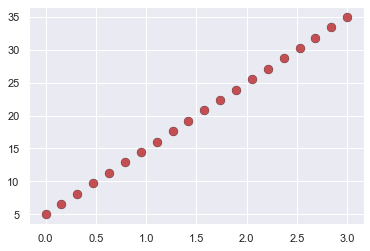

In [4]:
a = 5
b = 10
n_points = 20
x_min = 0
x_max = 3

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
y = a + b * x

plt.scatter(x, y, s=80, c ='r', edgecolors='k', linewidths=0.3)



Assuming we do not know actual values of $a$ and $b$,
how to find them if we only observe $x$ and $y$?

The answer is Normal Equation:

$$\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y},$$

where: $$\mathbf{w} = [a, b]$$ $$\mathbf{x} = [1, x] $$ $$\mathbf{X} = [\mathbf{x_1}, \dots, \mathbf{x_n}]$$ $$\mathbf{y} = [\mathbf{y_1}, \dots, \mathbf{y_n}]$$

Then, using these parameters we can model $y's$ as follow:
$$\mathbf{y} = \mathbf{w}^\top \mathbf{x}$$


In [5]:
X = np.concatenate([np.ones((n_points,1)), x], axis=1) # add intercept term

w =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # compute w

# .dot() is just a matrix multiplication
# np.linalg.inv(X) returns inverse of X

print('Computed line parameters:\n\nw[0] = {}\nw[1] = {}\
       \n\nActual line parameters:\n \nb = {}\na = {}'\
       .format(w[1][0], w[0][0], b,a))

Computed line parameters:

w[0] = 10.000000000000004
w[1] = 4.9999999999999964       

Actual line parameters:
 
b = 10
a = 5


In [6]:
def mean_squared_error(y_true, y_predicted):
    return ((y_true - y_predicted)**2).mean()

- Now let's see how could we measure the goodness of the fit numerically

- We use Mean Squared Error (MSE) which is nothing but SSE / n_points

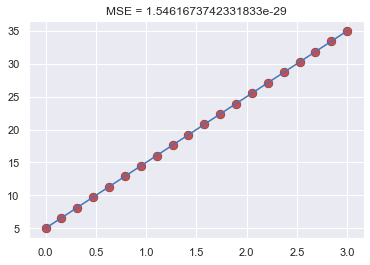

In [7]:
y_regression = X.dot(w) # compute predicted y

# y_regression stores predicted values
# y stores original values

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x, y_regression);
plt.title('MSE = {}'.format(mean_squared_error(y, y_regression)));

In [8]:
# define simple linear regression
def simple_linear_regression(X,y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 
    return X.dot(w), w

Not too interesting, let's add some white noise:
$$ y = a + bx + \mathcal{N}(0, 1)$$

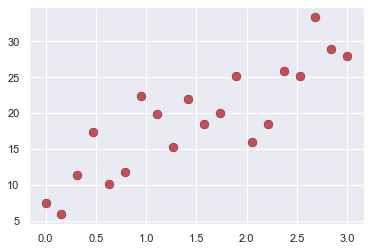

In [9]:
a = 5
b = 10
n_points = 20
x_min = 0
x_max = 3

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
completely_random_number = 42
rs = np.random.RandomState(completely_random_number) # Just for reproducibility 
noise = rs.normal(0, 5, (n_points, 1))

y_noised = a + b * x + noise 
plt.scatter(x,y_noised, s=80, c ='r', edgecolors='k', linewidths=0.3);

[[8.87283317]
 [6.84711602]]


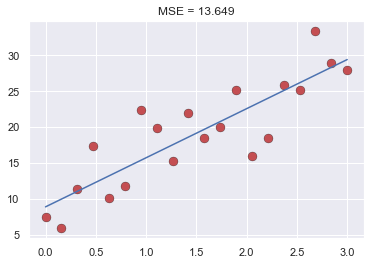

In [10]:
### With noise

X = np.concatenate([np.ones((n_points,1)), x], axis=1)

y_regression, w = simple_linear_regression(X, y_noised)

plt.scatter(x,y_noised, s=80, c ='r', edgecolors='k', linewidths=0.3);
plt.plot(x, y_regression);
plt.title('MSE = {}'.format(np.round(mean_squared_error(y_noised, y_regression), 3)));
print(w)

### Example: Olympic data

In [11]:
X = olympic_marathon[['Year']] 
# double brackets allow to preserve X as a "matrix"
y = olympic_marathon['Pace']

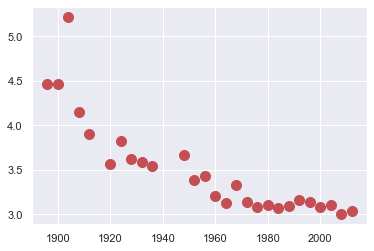

In [12]:
plt.plot(X, y, 'ro', markersize=10);

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
y_pred = lr.predict(X)

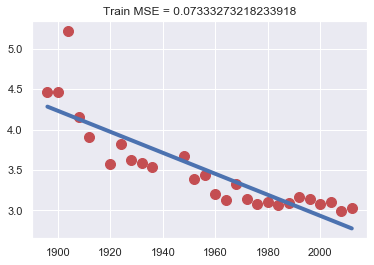

In [14]:
plt.plot(X, y, 'ro', markersize=10);
plt.plot(X, y_pred, linewidth=4);
plt.title('Train MSE = {}'.format(mean_squared_error(y, y_pred)));

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = make_pipeline(PolynomialFeatures(degree=5), 
                     LinearRegression(fit_intercept=False)
                    )
poly.fit(X, y)
y_pred = poly.predict(X)

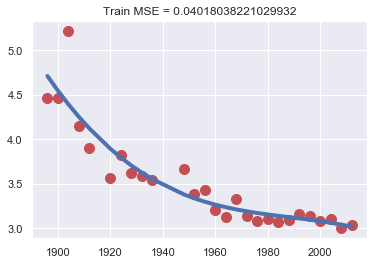

In [16]:
plt.plot(X, y, 'ro', markersize=10);
plt.plot(X, y_pred, linewidth=4);
plt.title('Train MSE = {}'.format(mean_squared_error(y, y_pred)));

### So far it seems that our regression problem is solved, isn't it?
Let's see
### Example: Tricky one

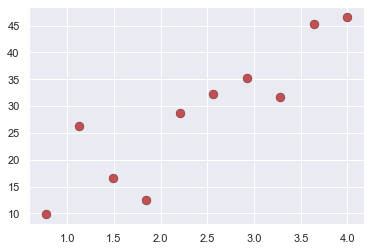

In [17]:
x = np.array([[ 0.76923077,  1.12820513,  1.48717949,  1.84615385,  2.20512821,
         2.56410256,  2.92307692,  3.28205128,  3.64102564,  4.        ]]).T

y = np.array([[  9.84030322,  26.33596415,  16.68207941,  12.43191433,
         28.76859577,  32.31335979,  35.26001044,  31.73889375,
         45.28107096,  46.6252025 ]]).T

n_points = 10

plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);

In [18]:
def simple_plot(x, y, y_regression, test_idx=None, prefix=''):
    plt.scatter(x,y, s=80, c ='r', edgecolors='k', linewidths=0.3);
    plt.plot(x,y_regression);
    if test_idx is not None:
        plt.scatter(x[test_idx], y[test_idx], s=80, c ='b', edgecolors='k', linewidths=0.3);
    plt.title('{} MSE = {}'.format(prefix, mean_squared_error(y, y_regression)));

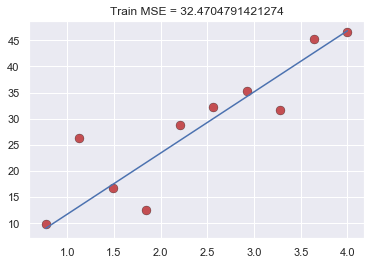

In [19]:
# Linear fit
lr = LinearRegression(fit_intercept=False)
lr.fit(x, y)
y_regression = lr.predict(x)

simple_plot(x, y, y_regression, prefix='Train') 

### Let's do "better'', add polynomial features $x^2$ and $x^3$

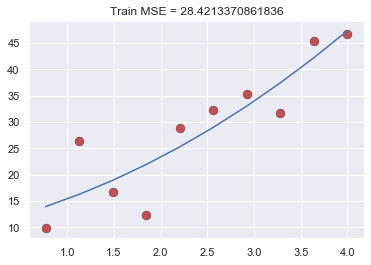

In [20]:
poly_3 = make_pipeline(PolynomialFeatures(degree=3),
                    LinearRegression(fit_intercept=False)
)
poly_3.fit(x, y)
y_regression = poly_3.predict(x)

simple_plot(x, y, y_regression, prefix='Train')

### And even better

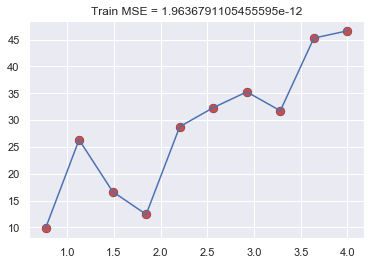

In [21]:
poly_9 = make_pipeline(PolynomialFeatures(degree=9),
                    LinearRegression(fit_intercept=False)
)
poly_9.fit(x, y)
y_regression = poly_9.predict(x)

simple_plot(x, y, y_regression, prefix='Train')

###  MSE = 0 seems much better than 28.42 right?

Not really if I told you that the real function wich produce such x'es and y's
is linear function with some white noise

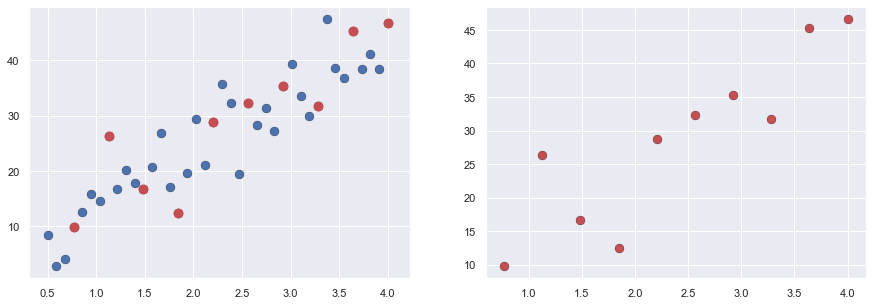

In [22]:
#Generating data
a = 5
b = 10
n_points = 40
x_min = 0.5
x_max = 4

x = np.linspace(x_min, x_max, n_points)[:, np.newaxis]
completely_random_number = 33
rs = np.random.RandomState(completely_random_number) # Just for reproducibility 
noise = rs.normal(0, 5, (n_points, 1))

y = a + b * x + noise
idx = np.arange(3, 40, 4)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x,y, s=80, c ='b', edgecolors='k', linewidths=0.3);
plt.scatter(x[idx], y[idx], s=80, c='r');
plt.subplot(1,2,2)
plt.scatter(x[idx], y[idx], s=80, c ='r', edgecolors='k', linewidths=0.3);

Now if use whole data to compare our "best model" which achieve MSE = 0 on red points, with simple linear model (MSE=28.42 on red points) we will see the difference. 


In [23]:
y_regression_3 = poly_3.predict(x)
y_regression_9 = poly_9.predict(x)

error_3 = mean_squared_error(y, y_regression_3)
error_9 = mean_squared_error(y, y_regression_9)
print("Error for regression with 3rd degree polynomial", error_3)
print("Error for regression with 9th degree polynomial", error_9)

Error for regression with 3rd degree polynomial 27.303246314014864
Error for regression with 9th degree polynomial 25487.45884052039


#### Takeaways
- Regression modelling is a supervised learning approach widely useful in the real-world tasks.
- Linear regression is simple method but can be very efficient if equipped with non-linear basis functions.
- It is easy to make things go wrong while trying to make your model better and more powerful. How to control the quality of your model and improve is going to be covered on the next lecture.

#### Literature

- Introduction to Statistical Learning by Hastie and Tibshirani, Springer, 2013
- All of Statistics: A Concise Course in Statistical Inference by Larry Wassermann, Springer.
- The Elements of Statistical Learning, 2nd edition by Hastie, Tibshirani and Friedman, Springer-Verlag, 2008 (available online).
- Pattern Recognition and Machine Learning by Bishop, Springer, 2006.  
- Machine Learning: A Probabilistic Perspective by Kevin P. Murphy, MIT Press, 2012.


 